# **NYC TAXI FARE PREDICTION**


In this Notebook fare prediction is done considering polynomial degrees of the features with highest correlation to fare amount.

##Adding features and polinomial degrees for prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/final_df.csv')

In [ ]:
## Create empty arrays for storing evaluation metrics of following algorithm execution for further comparison
r2_list = np.array([])
EV_list = np.array([])
MaxE_list = np.array([])
MAE_list = np.array([])
MSE_list = np.array([])

In [ ]:
m, n = data.shape
y = data.iloc[:,0].values.reshape(m,1)

For the further linear regression the features are scaled

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_Dy = data.drop(columns=['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'wd', 'month', 'hour']).values.reshape(m, 2)

scale = StandardScaler()            # feature scaling
X_Dy = scale.fit_transform(X_Dy)

X_Dy_train, X_Dy_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Dy,y,test_size=0.2, random_state=0)

In [ ]:
## Linear regression considering only distamce and year, without polynomial terms
model=linear_model.LinearRegression()
model.fit(X_Dy_train,y_train)

predictions=model.predict(X_Dy_test)

## Evaluation of prediction ##
r2 = sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, EV, MaxE, MAE, MSE 

(0.7107248887275119,
 0.7107258166580446,
 18.334198871384707,
 1.539147785763374,
 4.640467157424954)

In [ ]:
poly = PolynomialFeatures(degree=2)           # considering polynomial features of second degree

X_Dy_pol1 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel1 = LinearRegression()
polyModel1.fit(X_Dy_pol1, y_train)

predictions = polyModel1.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7216860922879159,
 1.4988233169487002,
 4.464630719564281,
 18.200551655478545,
 0.7216868634592553)

In [ ]:
poly = PolynomialFeatures(degree=3)                 # considering polynomial features of third degree

X_Dy_pol2 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel2 = LinearRegression()
polyModel2.fit(X_Dy_pol2, y_train)

predictions = polyModel2.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7257706649876348,
 1.4875129372351739,
 4.399107192905585,
 18.02828346877656,
 0.7257715964070353)

In [ ]:
poly = PolynomialFeatures(degree=4)                 # considering polynomial features of fourth degree

X_Dy_pol3 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel3 = LinearRegression()
polyModel3.fit(X_Dy_pol3, y_train)

predictions = polyModel3.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7266107621520679,
 1.485023446181328,
 4.385630598657816,
 17.954154641861855,
 0.7266116265230749)

Polynomial linear regression is now done using only interaction features features that are products of at most degree distinct input features (so not x[1] ** 2, x[0] * x[2] ** 3, etc.).

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)                 # considering polynomial features of second degree

X_Dy_pol1 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel1 = LinearRegression()
polyModel1.fit(X_Dy_pol1, y_train)

predictions = polyModel1.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=True)                 # considering polynomial features of third degree

X_Dy_pol2 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel2 = LinearRegression()
polyModel2.fit(X_Dy_pol2, y_train)

predictions = polyModel2.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

In [ ]:
poly = PolynomialFeatures(degree=4, interaction_only=True)                 # considering polynomial features of fourth degree

X_Dy_pol3 = poly.fit_transform(X_Dy_train)
poly.fit(X_Dy_train, y_train)

polyModel3 = LinearRegression()
polyModel3.fit(X_Dy_pol3, y_train)

predictions = polyModel3.predict(poly.fit_transform(X_Dy_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

Now also dropoff latitude is considered

In [ ]:
X_Dydl = data.drop(columns=['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'passenger_count', 'wd', 'month', 'hour']).values.reshape(m, 3)

scale = StandardScaler()            # feature scaling
X_Dydl = scale.fit_transform(X_Dydl)

X_Dydl_train, X_Dydl_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Dy,y,test_size=0.2, random_state=0)

In [ ]:
## Linear regression considering only distamce, dropoff latitude and year, without polynomial terms
model=linear_model.LinearRegression()
model.fit(X_Dydl_train,y_train)

predictions=model.predict(X_Dydl_test)

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7107248887275119,
 1.539147785763374,
 4.640467157424954,
 18.334198871384707,
 0.7107258166580446)

In [ ]:
poly = PolynomialFeatures(degree=2)           # considering polynomial features of second degree

X_Dydl_pol1 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel1 = LinearRegression()
polyModel1.fit(X_Dydl_pol1, y_train)

predictions = polyModel1.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7216860922879159,
 1.4988233169487002,
 4.464630719564281,
 18.200551655478545,
 0.7216868634592553)

In [ ]:
poly = PolynomialFeatures(degree=3)                 # considering polynomial features of third degree

X_Dydl_pol2 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel2 = LinearRegression()
polyModel2.fit(X_Dydl_pol2, y_train)

predictions = polyModel2.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7257706649876348,
 1.4875129372351739,
 4.399107192905585,
 18.02828346877656,
 0.7257715964070353)

In [ ]:
poly = PolynomialFeatures(degree=4)                 # considering polynomial features of fourth degree

X_Dydl_pol3 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel3 = LinearRegression()
polyModel3.fit(X_Dydl_pol3, y_train)

predictions = polyModel3.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7266107621520679,
 1.485023446181328,
 4.385630598657816,
 17.954154641861855,
 0.7266116265230749)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)                 # considering polynomial features of second degree

X_Dydl_pol1 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel1 = LinearRegression()
polyModel1.fit(X_Dydl_pol1, y_train)

predictions = polyModel1.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=True)                 # considering polynomial features of third degree

X_Dydl_pol2 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel2 = LinearRegression()
polyModel2.fit(X_Dydl_pol2, y_train)

predictions = polyModel2.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

In [ ]:
poly = PolynomialFeatures(degree=4, interaction_only=True)                 # considering polynomial features of fourth degree

X_Dydl_pol3 = poly.fit_transform(X_Dydl_train)
poly.fit(X_Dydl_train, y_train)

polyModel3 = LinearRegression()
polyModel3.fit(X_Dydl_pol3, y_train)

predictions = polyModel3.predict(poly.fit_transform(X_Dydl_test))

## Evaluation of prediction ##
r2=sklearn.metrics.r2_score(y_test, predictions)
EV = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE = sklearn.metrics.max_error(y_test, predictions)
MAE = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)

r2_list = np.append(r2_list, r2)
EV_list = np.append(EV_list, EV)
MaxE_list = np.append(MaxE_list, MaxE)
MAE_list = np.append(MAE_list, MAE)
MSE_list = np.append(MSE_list, MSE)
r2, MAE, MSE, MaxE, EV

(0.7166365022011596,
 1.5208341932443634,
 4.545634774330606,
 19.13319834773526,
 0.7166379668823434)

In [ ]:
r2_list.reshape(14,1)
MAE_list.reshape(14,1)
MSE_list.reshape(14,1)
MaxE_list.reshape(14,1)
EV_list.reshape(14,1)

r2 = pd.DataFrame(r2_list, columns=['r2'], index=['dist-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on', 'dist-drop_lat-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on'])
MAE = pd.DataFrame(MAE_list, columns=['r2'], index=['dist-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on', 'dist-drop_lat-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on'])
MSE = pd.DataFrame(MSE_list, columns=['r2'], index=['dist-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on', 'dist-drop_lat-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on'])
MaxE = pd.DataFrame(MaxE_list, columns=['r2'], index=['dist-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on', 'dist-drop_lat-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on'])
EV = pd.DataFrame(EV_list, columns=['r2'], index=['dist-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on', 'dist-drop_lat-year', '2nd_deg', '3rd_deg', '4th_deg','2nd_deg_int_on', '3rd_deg_int_on', '4th_deg_int_on'])


In [ ]:
r2    # Display accuracies for different combinations of polynomial degrees, and using only the interactions

,r2
dist-year,0.710725
2nd_deg,0.721686
3rd_deg,0.725771
4th_deg,0.726611
2nd_deg_int_on,0.716637
3rd_deg_int_on,0.716637
4th_deg_int_on,0.716637
dist-drop_lat-year,0.710725
2nd_deg,0.721686
3rd_deg,0.725771


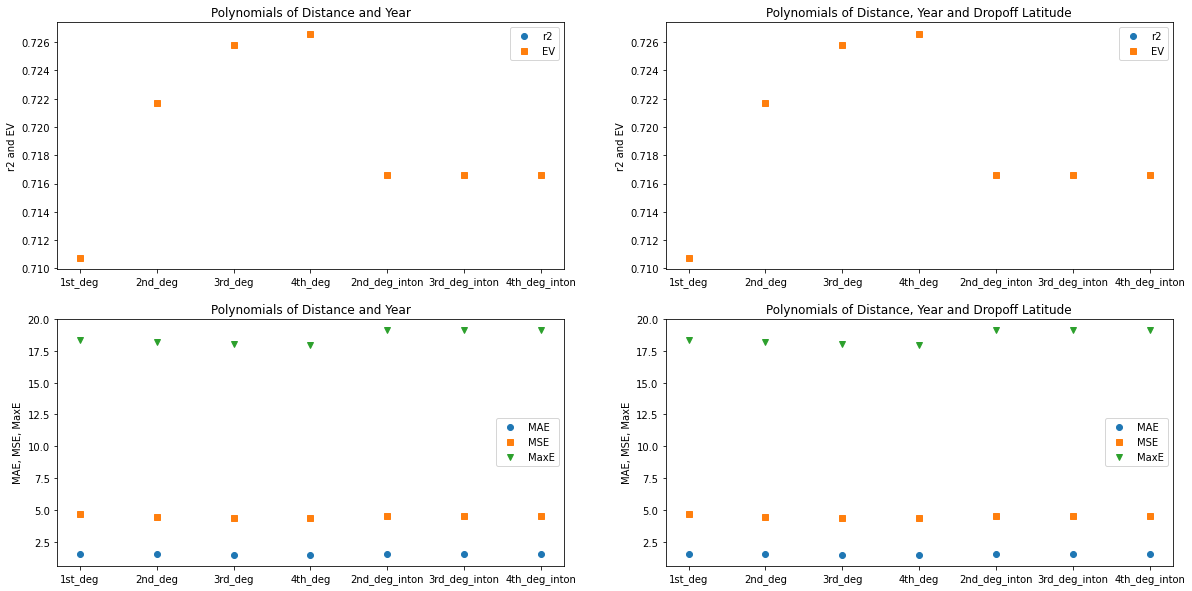

In [ ]:
# Plot the evaluation metrics 
import matplotlib.pyplot as plt
from matplotlib import markers
names = ['1st_deg', '2nd_deg','3rd_deg','4th_deg','2nd_deg_inton','3rd_deg_inton','4th_deg_inton']

plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.title('Polynomials of Distance and Year')
plt.ylabel('r2 and EV')
plt.plot(names, r2_list[0:7], 'o', names, EV_list[0:7], 's')
plt.legend(labels=['r2', 'EV'])
print()
plt.subplot(222)
plt.title('Polynomials of Distance, Year and Dropoff Latitude')
plt.ylabel('r2 and EV')
plt.plot(names, r2_list[7:15], 'o', names, EV_list[7:15], 's')
plt.legend(labels=['r2', 'EV'])
print()
plt.subplot(223)
plt.title('Polynomials of Distance and Year')
plt.ylabel('MAE, MSE, MaxE')
plt.plot(names, MAE_list[0:7], 'o', names, MSE_list[0:7], 's', names, MaxE_list[0:7], 'v')
plt.legend(labels=['MAE', 'MSE', 'MaxE'])
print()
plt.subplot(224)
plt.title('Polynomials of Distance, Year and Dropoff Latitude')
plt.ylabel('MAE, MSE, MaxE')
plt.plot(names, MAE_list[7:15], 'o', names, MSE_list[7:15], 's', names, MaxE_list[7:15], 'v')
plt.legend(labels=['MAE', 'MSE', 'MaxE'])

#plt.plot(names, MAE_list, 'o', names, MSE_list, 's')

plt.show()

## Other Regression algorithms for prediction

Neural network approach for regression considering all initial features

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X = data.drop(columns=['fare_amount'])
y = data.iloc[:,0].values

## Use 4 hidden layers ##
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(hidden_layer_sizes=4, activation='relu', solver='adam', alpha=0.0001, max_iter=1000, tol=0.0001).fit(X_train, y_train)

predictions = regr.predict(X_test)

r2_mlp=sklearn.metrics.r2_score(y_test, predictions)
EV_mlp = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_mlp = sklearn.metrics.max_error(y_test, predictions)
MAE_mlp = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_mlp = sklearn.metrics.mean_squared_error(y_test, predictions)

print('The accuracy is:')
print(r2_mlp)
print()
print('The explained variance score is:')
print(EV_mlp)
print()
print('The maximum error is:')
print(MaxE_mlp)
print()
print('The mean absolute error is:')
print(MAE_mlp)
print()
print('The mean squared error is:')
print(MSE_mlp) 

The accuracy is:
0.7100212500196368

The explained variance score is:
0.7137892453186625

The maximum error is:
18.836299453138764

The mean absolute error is:
1.4935783227990502

The mean squared error is:
4.6484664408086065


In [ ]:
## Use 5 hidden layers ##
regr = MLPRegressor(hidden_layer_sizes=5, activation='relu', solver='adam', alpha=0.0001, max_iter=1000, tol=0.0001).fit(X_train, y_train)

predictions = regr.predict(X_test)

r2_mlp1=sklearn.metrics.r2_score(y_test, predictions)
EV_mlp1 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_mlp1 = sklearn.metrics.max_error(y_test, predictions)
MAE_mlp1 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_mlp1 = sklearn.metrics.mean_squared_error(y_test, predictions)

print('The accuracy is:')
print(r2_mlp1)
print()
print('The explained variance score is:')
print(EV_mlp1)
print()
print('The maximum error is:')
print(MaxE_mlp1)
print()
print('The mean absolute error is:')
print(MAE_mlp1)
print()
print('The mean squared error is:')
print(MSE_mlp1) 

The accuracy is:
0.7053347765936677

The explained variance score is:
0.7086526823279795

The maximum error is:
18.214511420786323

The mean absolute error is:
1.5960972185617828

The mean squared error is:
4.723592340371364


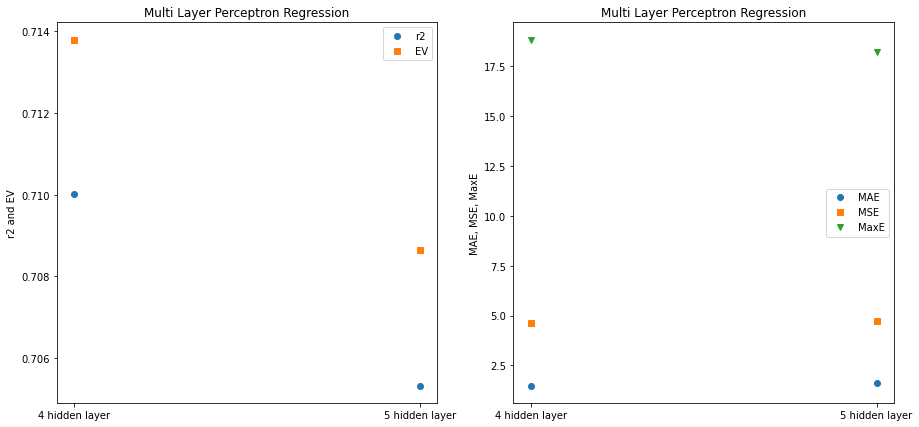

In [ ]:
names = ['4 hidden layer', '5 hidden layer']
r2_mlp_values =[r2_mlp, r2_mlp1]
EV_mlp_values =[EV_mlp, EV_mlp1]

MAE_mlp_values =[MAE_mlp, MAE_mlp1]
MSE_mlp_values =[MSE_mlp, MSE_mlp1]
MaxE_mlp_values =[MaxE_mlp, MaxE_mlp1]

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title('Multi Layer Perceptron Regression')
plt.ylabel('r2 and EV')
plt.plot(names, r2_mlp_values, 'o', EV_mlp_values, 's')
plt.legend(labels=['r2', 'EV'])

plt.subplot(122)
plt.title('Multi Layer Perceptron Regression')
plt.ylabel('MAE, MSE, MaxE')
plt.plot(names, MAE_mlp_values, 'o', MSE_mlp_values, 's', names, MaxE_mlp_values, 'v')
plt.legend(labels=['MAE', 'MSE', 'MaxE'])

plt.show()

Random Forest Regressor considering all features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state=0, n_estimators= 100 )   #  max depth indicates the max amount of decision trees generated
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf=sklearn.metrics.r2_score(y_test, predictions)
EV_rf = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf = sklearn.metrics.max_error(y_test, predictions)
MAE_rf = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf = sklearn.metrics.mean_squared_error(y_test, predictions)

print('The accuracy is:')
print(r2_rf)
print()
print('The explained variance score is:')
print(EV_rf)
print()
print('The maximum error is:')
print(MaxE_rf)
print()
print('The mean absolute error is:')
print(MAE_rf)
print()
print('The mean squared error is:')
print(MSE_rf) 

The accuracy is:
0.6398491156906432

The explained variance score is:
0.639851189990474

The maximum error is:
16.302345113913788

The mean absolute error is:
1.7766197020353978

The mean squared error is:
5.773351666123668


In [ ]:
rf = RandomForestRegressor(max_depth = 3, random_state=0, n_estimators= 100 )
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf1=sklearn.metrics.r2_score(y_test, predictions)
EV_rf1 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf1 = sklearn.metrics.max_error(y_test, predictions)
MAE_rf1 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf1 = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_rf1)
print()
print('The explained variance score is:')
print(EV_rf1)
print()
print('The maximum error is:')
print(MaxE_rf1)
print()
print('The mean absolute error is:')
print(MAE_rf1)
print()
print('The mean squared error is:')
print(MSE_rf1) 

The accuracy is:
0.6873260361806313

The explained variance score is:
0.6873275935861223

The maximum error is:
16.965856433341195

The mean absolute error is:
1.6187880481702233

The mean squared error is:
5.012279099166285


In [ ]:
rf = RandomForestRegressor(max_depth = 4, random_state=0, n_estimators= 100 )
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf2=sklearn.metrics.r2_score(y_test, predictions)
EV_rf2 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf2 = sklearn.metrics.max_error(y_test, predictions)
MAE_rf2 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf2 = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_rf2)
print()
print('The explained variance score is:')
print(EV_rf2)
print()
print('The maximum error is:')
print(MaxE_rf2)
print()
print('The mean absolute error is:')
print(MAE_rf2)
print()
print('The mean squared error is:')
print(MSE_rf2) 

The accuracy is:
0.7130063122359571

The explained variance score is:
0.7130074978844267

The maximum error is:
17.26862617388711

The mean absolute error is:
1.5332454407427734

The mean squared error is:
4.600614791205903


In [ ]:
rf = RandomForestRegressor(max_depth = 5, random_state=0, n_estimators= 100 )
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf3=sklearn.metrics.r2_score(y_test, predictions)
EV_rf3 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf3 = sklearn.metrics.max_error(y_test, predictions)
MAE_rf3 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf3 = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_rf3)
print()
print('The explained variance score is:')
print(EV_rf3)
print()
print('The maximum error is:')
print(MaxE_rf3)
print()
print('The mean absolute error is:')
print(MAE_rf3)
print()
print('The mean squared error is:')
print(MSE_rf3) 

The accuracy is:
0.7221528790296452

The explained variance score is:
0.7221539175573211

The maximum error is:
17.337840472183558

The mean absolute error is:
1.5019188025689352

The mean squared error is:
4.453991948008072


In [ ]:
rf = RandomForestRegressor(max_depth = 6, random_state=0, n_estimators= 100 )
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf4=sklearn.metrics.r2_score(y_test, predictions)
EV_rf4 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf4 = sklearn.metrics.max_error(y_test, predictions)
MAE_rf4 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf4 = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_rf4)
print()
print('The explained variance score is:')
print(EV_rf4)
print()
print('The maximum error is:')
print(MaxE_rf4)
print()
print('The mean absolute error is:')
print(MAE_rf4)
print()
print('The mean squared error is:')
print(MSE_rf4) 

The accuracy is:
0.7309809078330418

The explained variance score is:
0.7309821428226337

The maximum error is:
17.648999036895045

The mean absolute error is:
1.4691906087457365

The mean squared error is:
4.312475386419128


In [ ]:
rf = RandomForestRegressor(max_depth = 7, random_state=0, n_estimators= 100 )
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

r2_rf5=sklearn.metrics.r2_score(y_test, predictions)
EV_rf5 = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_rf5 = sklearn.metrics.max_error(y_test, predictions)
MAE_rf5 = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_rf5 = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_rf5)
print()
print('The explained variance score is:')
print(EV_rf5)
print()
print('The maximum error is:')
print(MaxE_rf5)
print()
print('The mean absolute error is:')
print(MAE_rf5)
print()
print('The mean squared error is:')
print(MSE_rf5) 

The accuracy is:
0.7398576317515767

The explained variance score is:
0.7398589772091302

The maximum error is:
17.69352984546191

The mean absolute error is:
1.4387067383414112

The mean squared error is:
4.17017822415318


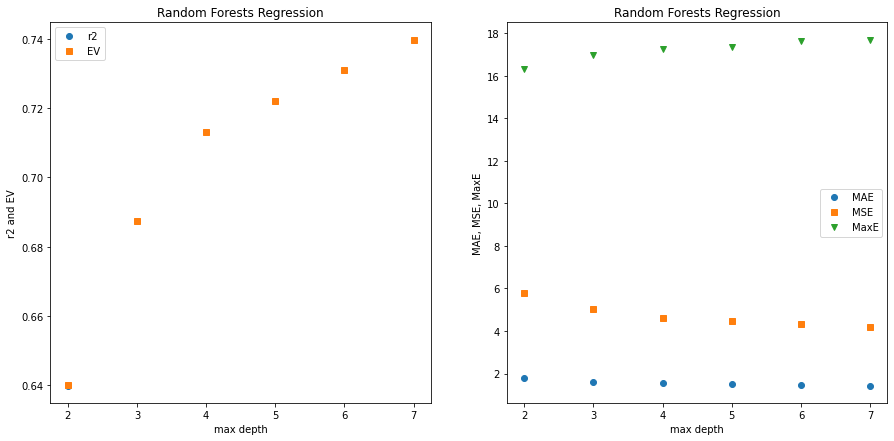

In [ ]:
# Plot evaluation metrics for different configurations of the Random Forest Regressor
names = ['2', '3', '4', '5', '6', '7']
r2_rf_values =[r2_rf, r2_rf1,r2_rf2, r2_rf3,r2_rf4, r2_rf5]
EV_rf_values =[EV_rf, EV_rf1,EV_rf2, EV_rf3,EV_rf4, EV_rf5]

MAE_rf_values =[MAE_rf, MAE_rf1,MAE_rf2, MAE_rf3,MAE_rf4, MAE_rf5]
MSE_rf_values =[MSE_rf, MSE_rf1,MSE_rf2, MSE_rf3,MSE_rf4, MSE_rf5]
MaxE_rf_values =[MaxE_rf, MaxE_rf1,MaxE_rf2, MaxE_rf3,MaxE_rf4, MaxE_rf5]

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title('Random Forests Regression')
plt.ylabel('r2 and EV')
plt.xlabel('max depth')
plt.plot(names, r2_rf_values, 'o', EV_rf_values, 's')
plt.legend(labels=['r2', 'EV'])

plt.subplot(122)
plt.title('Random Forests Regression')
plt.ylabel('MAE, MSE, MaxE')
plt.xlabel('max depth')
plt.plot(names, MAE_rf_values, 'o', MSE_rf_values, 's', names, MaxE_rf_values, 'v')
plt.legend(labels=['MAE', 'MSE', 'MaxE'])

plt.show()

Gradient Boosting Regressor considering all features

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
r2_gb=sklearn.metrics.r2_score(y_test, predictions)
EV_gb = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_gb = sklearn.metrics.max_error(y_test, predictions)
MAE_gb = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_gb = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_gb)
print()
print('The explained variance score is:')
print(EV_gb)
print()
print('The maximum error is:')
print(MaxE_gb)
print()
print('The mean absolute error is:')
print(MAE_gb)
print()
print('The mean squared error is:')
print(MSE_gb) 

The accuracy is:
0.7600645079421228

The explained variance score is:
0.7600653540912813

The maximum error is:
18.768163530295183

The mean absolute error is:
1.3697759785118606

The mean squared error is:
3.846254537153052


As the gradient boosting regressor performs best in prediction try to use the square root transformation of the distance as it has a more normal distribution and same correlation to the fare amount as the distance.

In [ ]:
data['D_sqrt'] = np.sqrt(data['D'])  
data = data.drop(columns=['D'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909157 entries, 0 to 909156
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        909157 non-null  float64
 1   pickup_longitude   909157 non-null  float64
 2   pickup_latitude    909157 non-null  float64
 3   dropoff_longitude  909157 non-null  float64
 4   dropoff_latitude   909157 non-null  float64
 5   passenger_count    909157 non-null  int64  
 6   wd                 909157 non-null  int64  
 7   month              909157 non-null  int64  
 8   year               909157 non-null  int64  
 9   hour               909157 non-null  int64  
 10  D_sqrt             909157 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 76.3 MB


In [ ]:
X_Dsqrty = data.iloc[:,1:].values.reshape(m,10)
y = data.iloc[:,0].values

scale = StandardScaler()            # feature scaling
X_Dsqrty = scale.fit_transform(X_Dsqrty)

X_Dsqrty_train, X_Dsqrty_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Dsqrty,y,test_size=0.2, random_state=0)


In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_Dsqrty_train, y_train)
predictions = reg.predict(X_Dsqrty_test)
r2_gb=sklearn.metrics.r2_score(y_test, predictions)
EV_gb = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_gb = sklearn.metrics.max_error(y_test, predictions)
MAE_gb = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_gb = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_gb)
print()
print('The explained variance score is:')
print(EV_gb)
print()
print('The maximum error is:')
print(MaxE_gb)
print()
print('The mean absolute error is:')
print(MAE_gb)
print()
print('The mean squared error is:')
print(MSE_gb) 

The accuracy is:
0.7623296394073403

The explained variance score is:
0.7623301583454656

The maximum error is:
18.85013803576488

The mean absolute error is:
1.3639397851500703

The mean squared error is:
3.8126387637430876


In [ ]:
X01 = data.iloc[:,10].values.reshape(m, 1)
X02 = data.iloc[:,8].values.reshape(m, 1)
X = np.append(X01, X02, axis=1)
X

array([[1.01469244e+00, 2.00900000e+03],
       [1.17861451e+00, 2.01100000e+03],
       [1.67206150e+00, 2.01200000e+03],
       ...,
       [1.41924487e+00, 2.01200000e+03],
       [1.20990278e+00, 2.01400000e+03],
       [1.69129299e+00, 2.01500000e+03]])

In [ ]:
poly = PolynomialFeatures(degree=3) 
X_pol = poly.fit_transform(X)
X_pol.shape

(909157, 10)

In [ ]:
X_01 = data.drop(columns=['fare_amount', 'year', 'D_sqrt'])
X = np.append(X_pol, X_01, axis=1)
X.shape

(909157, 18)

In [ ]:
scale = StandardScaler()            # feature scaling
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
r2_gb=sklearn.metrics.r2_score(y_test, predictions)
EV_gb = sklearn.metrics.explained_variance_score(y_test, predictions)
MaxE_gb = sklearn.metrics.max_error(y_test, predictions)
MAE_gb = sklearn.metrics.mean_absolute_error(y_test, predictions)
MSE_gb = sklearn.metrics.mean_squared_error(y_test, predictions)
print('The accuracy is:')
print(r2_gb)
print()
print('The explained variance score is:')
print(EV_gb)
print()
print('The maximum error is:')
print(MaxE_gb)
print()
print('The mean absolute error is:')
print(MAE_gb)
print()
print('The mean squared error is:')
print(MSE_gb) 

The accuracy is:
0.7631407663545134

The explained variance score is:
0.7631412617162505

The maximum error is:
18.89223767452684

The mean absolute error is:
1.3606778866711424

The mean squared error is:
3.799626901290416
